In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [2]:
rounddf=pd.read_csv("round.csv")
userround=pd.read_csv("userround.csv")
user=pd.read_csv("user.csv")
session=pd.read_csv("session.csv")
display(userround)

,id,has_seleced,option_selected,timestamp,round_id,user_id
0,1,1,4,2015-12-12 11:15:47.488159,1,1
1,2,1,3,2015-12-12 11:15:40.016475,1,2
2,3,1,4,2015-12-12 11:15:41.971357,1,3
3,4,1,2,2015-12-12 11:15:40.065619,1,6
4,5,1,2,2015-12-12 11:15:39.146240,1,7
5,6,1,3,2015-12-12 11:15:43.870866,1,8
6,7,1,3,2015-12-12 11:16:13.472208,2,1
7,8,1,4,2015-12-12 11:16:04.657920,2,2
8,9,1,4,2015-12-12 11:16:08.323566,2,3
9,10,1,1,2015-12-12 11:16:09.729222,2,6


In [3]:
def optionmatrix(game):
    OM=[[2 for i in range(6)] for j in range(10)]
    for j in range(10):
        for i in range(6):
            OM[j][i]=userround.loc[60*game+j*6+i,"option_selected"]
    return OM
display(optionmatrix(37))

[[2, 4, 2, 2, 2, 2],
 [2, 4, 2, 2, 2, 0],
 [2, 4, 0, 2, 0, 2],
 [2, 4, 2, 2, 4, 4],
 [2, 4, 2, 0, 2, 2],
 [2, 2, 0, 2, 2, 4],
 [2, 2, 0, 2, 0, 4],
 [4, 4, 2, 2, 2, 3],
 [2, 4, 0, 2, 2, 3],
 [2, 2, 0, 0, 2, 3]]

In [4]:
oddity=[0]*max(rounddf["session_id"])
odds=0
for k in range(max(rounddf["session_id"])):
    OM=optionmatrix(k)
    if (any(1 in array for array in OM)==True or any(3 in array for array in OM)==True):
        oddity[k]=1
    else:
        oddity[k]=0
for k in range (max(rounddf["session_id"])):
    if (oddity[k]!=0):
        odds+=1
for k in range(len(session)):
    print(k,oddity[k],session.loc[k,"options_024"])
print(len(session),odds,len(session)-odds)

0 1 0
1 1 0
2 1 0
3 1 0
4 1 0
5 1 0
6 1 0
7 1 0
8 1 0
9 1 0
10 1 0
11 1 0
12 1 0
13 1 0
14 1 0
15 1 0
16 1 0
17 1 0
18 1 0
19 1 0
20 1 0
21 1 0
22 1 0
23 1 0
24 1 0
25 1 0
26 1 0
27 1 0
28 1 0
29 0 1
30 0 1
31 0 1
32 0 1
33 0 1
34 0 1
35 0 1
36 0 1
37 1 1
38 0 1
39 0 1
40 0 1
41 0 1
42 0 1
43 0 1
44 0 1
45 0 1
46 0 1
47 0 1
48 0 1
49 0 1
50 0 1
51 0 1
52 0 1
53 1 0
54 31 23


In [18]:
# funcions definides per quan hi ha les opcions 0,2,4
# round_=[0,10] en funcions sense un timestep, round_=[0,9] amb un timestep
def prob1(round_): # p(s(t))
    p=[0.0 for i in range(3)]
    for i in range(3):
        for n in range(6):
            for k in range(max(userround["round_id"])//10):
                if(oddity[k]==0):
                    OM=optionmatrix(k)
                    if (OM[round_][n]==2*i):
                        p[i]+=1.0
        p[i]=p[i]/(6*odds)
    return p
print("prob 1 jugador i 1 ronda:",prob1(5))
def prob1dt(round_): # p(s(t+1),s(t))
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for n in range(6):
                for k in range(max(userround["round_id"])//10):
                    if(oddity[k]==0):
                        OM=optionmatrix(k)
                        if (OM[round_][n]==2*i and OM[round_+1][n]==2*j):
                            p[i][j]+=1.0
            p[i][j]=p[i][j]/(6*odds)
    return p
print("prob 1 jugador i 2 rondes:",prob1dt(5))
def probothers(round_): # p(others s(t))
    p=[0.0 for i in range(3)]
    for i in range(3):
        for m in range(6):
            for k in range(max(userround["round_id"])//10):
                if(oddity[k]==0):
                    OM=optionmatrix(k)
                    othersmean=0
                    for n in range(6):
                        if (n!=m):
                            othersmean+=OM[round_][n]
                    othersmean=2*round(othersmean/10)
                    if (othersmean==2*i):
                        p[i]+=1.0
        p[i]=p[i]/(6*odds)
    return p
print("prob 5 jugadors i 1 ronda:",probothers(5))
def prob2(round_): # p({s(t)})
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for l in range(3):
            for m in range(6):
                for k in range(max(userround["round_id"])//10):
                    if(oddity[k]==0):
                        OM=optionmatrix(k)
                        othersmean=0
                        for n in range(6):
                            if (n!=m):
                                othersmean+=OM[round_][n]
                        othersmean=2*round(othersmean/10)
                        if (OM[round_][m]==2*i and othersmean==2*l):
                            p[i][l]+=1.0
            p[i][l]=p[i][l]/(6*odds)
    return p
print("prob 6 jugadors i 1 ronda:",prob2(5))
def prob2dt(round_): # p({s(t+1)},{s(t)})
    p=[[[0.0 for i in range(3)] for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for l in range(3):
                for m in range(6):
                    for k in range(max(userround["round_id"])//10):
                        if(oddity[k]==0):
                            OM=optionmatrix(k)
                            othersmean=0
                            for n in range(6):
                                if (n!=m):
                                    othersmean+=OM[round_][n]
                            othersmean=2*round(othersmean/10)
                            if (OM[round_][m]==2*i and OM[round_+1][m]==2*j and othersmean==2*l):
                                p[i][j][l]+=1.0
                p[i][j][l]=p[i][j][l]/(6*odds)
    return p
print("prob 6 jugadors i 2 rondes:",prob2dt(5))
def log2(x):
    if(x==0.0):
        log2=0.0
    else:
        log2=np.log2(x)
    return log2
def transferentropy(round_): # definida en bits
    h=0.0
    p1=prob1(round_)
    p1dt=prob1dt(round_)
    p2=prob2(round_)
    p2dt=prob2dt(round_)
    for i in range(3):
        for j in range(3):
            if (p1dt[i][j]!=0.0 and p1[i]!=0.0):
                h+=-p1dt[i][j]*log2(p1dt[i][j]/p1[i])
            for l in range(3):
                if (p2dt[i][j][l]!=0.0 and p2[i][l]!=0.0):
                    h+=p2dt[i][j][l]*log2(p2dt[i][j][l]/p2[i][l])
    return h
def mutualinfo(round_):
    I=0.0
    p1=prob1(round_)
    p2=probothers(round_)
    p12=prob2(round_)
    for i in range(3):
        for j in range(3):
            if (p12[i][j]!=0.0):
                I+=p12[i][j]*log2(p12[i][j]/(p1[i]*p2[j]))
    return I

prob 1 jugador i 1 ronda: [0.16129032258064516, 0.3172043010752688, 0.26344086021505375]
prob 1 jugador i 2 rondes: [[0.06989247311827956, 0.06989247311827956, 0.021505376344086023], [0.07526881720430108, 0.1827956989247312, 0.05913978494623656], [0.026881720430107527, 0.10752688172043011, 0.12903225806451613]]
prob 5 jugadors i 1 ronda: [0.005376344086021506, 0.6397849462365591, 0.0967741935483871]
prob 6 jugadors i 1 ronda: [[0.0, 0.14516129032258066, 0.016129032258064516], [0.0, 0.26344086021505375, 0.053763440860215055], [0.005376344086021506, 0.23118279569892472, 0.026881720430107527]]
prob 6 jugadors i 2 rondes: [[[0.0, 0.06451612903225806, 0.005376344086021506], [0.0, 0.05913978494623656, 0.010752688172043012], [0.0, 0.021505376344086023, 0.0]], [[0.0, 0.053763440860215055, 0.021505376344086023], [0.0, 0.15053763440860216, 0.03225806451612903], [0.0, 0.05913978494623656, 0.0]], [[0.0, 0.026881720430107527, 0.0], [0.005376344086021506, 0.08064516129032258, 0.021505376344086023], 

[0.05070529451580503, 0.022659373144213013, 0.06014008407389906, 0.062157440669042746, 0.05688980075659439, 0.06576287865508501, 0.037443100943546, 0.08396503531062738, 0.14508990628648052] [0.055388145597895275, 0.003952615609523313, 0.0206629286954327, 0.07341974664531245, 0.002530194389475004, 0.01773122703807245, 0.04386045338266618, 0.07893428067291168, 0.1223434163921027, 0.07092155917127937]


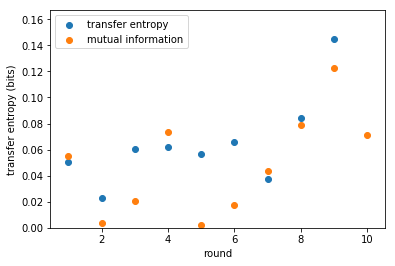

In [6]:
T=[0.0 for k in range(9)]
I=[0.0 for k in range(10)]
for k in range(9):
    T[k]=transferentropy(k)
for k in range(10):
    I[k]=mutualinfo(k)
print(T,I)
plt.scatter(list(range(1,10)),T,label="transfer entropy")
plt.scatter(list(range(1,11)),I,label="mutual information")
plt.xlabel("round")
plt.ylabel("transfer entropy (bits)")
plt.legend(loc="upper left")
plt.ylim(0.0)
plt.show()

In [7]:
neq=0
nuneq=0
for k in range(len(session)):
    if (session.loc[k,"unequality"]==0 and oddity[k]==0):
        neq+=1
    elif (session.loc[k,"unequality"]==1 and oddity[k]==0):
        nuneq+=1
print(neq,nuneq)

11 12


In [8]:
# funcions que separen per si els endownments són iguals o desiguals
# unequality = 0 (equal), 1 (unequal)
def prob1e(round_,unequality): # p(s(t))
    p=[0.0 for i in range(3)]
    for i in range(3):
        for n in range(6):
            for k in range(len(session)):
                if(oddity[k]==0 and int(session.loc[k,"unequality"])==unequality):
                    OM=optionmatrix(k)
                    if (OM[round_][n]==2*i):
                        p[i]+=1.0
        p[i]=p[i]/(6*12)
    return p
print("prob 1 jugador i 1 ronda:",prob1e(5,0))
def prob1dte(round_,unequality): # p(s(t+1),s(t))
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for n in range(6):
                for k in range(len(session)):
                    if(oddity[k]==0 and int(session.loc[k,"unequality"])==unequality):
                        OM=optionmatrix(k)
                        if (OM[round_][n]==2*i and OM[round_+1][n]==2*j):
                            p[i][j]+=1.0
            p[i][j]=p[i][j]/(6*12)
    return p
print("prob 1 jugador i 2 rondes:",prob1dte(5,0))
def prob2e(round_,unequality): # p({s(t)})
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for l in range(3):
            for m in range(6):
                for k in range(len(session)):
                    if(oddity[k]==0 and int(session.loc[k,"unequality"])==unequality):
                        OM=optionmatrix(k)
                        othersmean=0
                        for n in range(6):
                            if (n!=m):
                                othersmean+=OM[round_][n]
                        othersmean=2*round(othersmean/10)
                        if (OM[round_][m]==2*i and othersmean==2*l):
                            p[i][l]+=1.0
            p[i][l]=p[i][l]/(6*12)
    return p
print("prob 6 jugadors i 1 ronda:",prob2e(5,0))
def prob2dte(round_,unequality): # p({s(t+1)},{s(t)})
    p=[[[0.0 for i in range(3)] for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for l in range(3):
                for m in range(6):
                    for k in range(len(session)):
                        if(oddity[k]==0 and int(session.loc[k,"unequality"])==unequality):
                            OM=optionmatrix(k)
                            othersmean=0
                            for n in range(6):
                                if (n!=m):
                                    othersmean+=OM[round_][n]
                            othersmean=2*round(othersmean/10)
                            if (OM[round_][m]==2*i and OM[round_+1][m]==2*j and othersmean==2*l):
                                p[i][j][l]+=1.0
                p[i][j][l]=p[i][j][l]/(6*12)
    return p
print("prob 6 jugadors i 2 rondes:",prob2dte(5,0))
def transferentropye(round_,unequality): # definida en bits
    h=0.0
    p1=prob1e(round_,unequality)
    p1dt=prob1dte(round_,unequality)
    p2=prob2e(round_,unequality)
    p2dt=prob2dte(round_,unequality)
    for i in range(3):
        for j in range(3):
            if (p1dt[i][j]!=0.0 and p1[i]!=0.0):
                h+=-p1dt[i][j]*log2(p1dt[i][j]/p1[i])
            for l in range(3):
                if (p2dt[i][j][l]!=0.0 and p2[i][l]!=0.0):
                    h+=p2dt[i][j][l]*log2(p2dt[i][j][l]/p2[i][l])
    return h

prob 1 jugador i 1 ronda: [0.125, 0.4305555555555556, 0.3611111111111111]
prob 1 jugador i 2 rondes: [[0.027777777777777776, 0.08333333333333333, 0.013888888888888888], [0.1111111111111111, 0.2777777777777778, 0.041666666666666664], [0.05555555555555555, 0.2222222222222222, 0.08333333333333333]]
prob 6 jugadors i 1 ronda: [[0.0, 0.125, 0.0], [0.0, 0.2916666666666667, 0.1388888888888889], [0.0, 0.2916666666666667, 0.06944444444444445]]
prob 6 jugadors i 2 rondes: [[[0.0, 0.027777777777777776, 0.0], [0.0, 0.08333333333333333, 0.0], [0.0, 0.013888888888888888, 0.0]], [[0.0, 0.05555555555555555, 0.05555555555555555], [0.0, 0.19444444444444445, 0.08333333333333333], [0.0, 0.041666666666666664, 0.0]], [[0.0, 0.05555555555555555, 0.0], [0.0, 0.16666666666666666, 0.05555555555555555], [0.0, 0.06944444444444445, 0.013888888888888888]]]


[0.10608342462731236, 0.06985314769614095, 0.1450540092200882, 0.11088511066517241, 0.06545447554585278, 0.0552619806637925, 0.010969741750037315, 0.11544912304297157, 0.056711742694590526]
[0.015577733845377181, 0.07955346140034943, 0.06410548470695565, 0.0697000574526381, 0.09651852255859308, 0.05886297771638939, 0.05108512448274405, 0.20453315760514706, 0.2640657681181302]


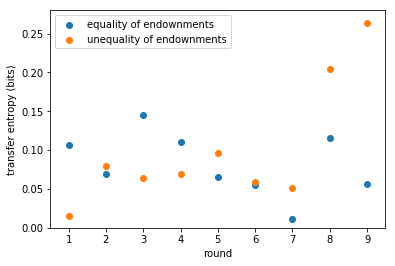

In [9]:
Te=[0.0 for k in range(9)]
Tune=[0.0 for k in range(9)]
for k in range(9):
    Te[k]=transferentropye(k,0)
    Tune[k]=transferentropye(k,1)
print(Te)
print(Tune)
plt.scatter(list(range(1,10)),Te,label="equality of endownments")
plt.scatter(list(range(1,10)),Tune,label="unequality of endownments")
plt.xlabel("round")
plt.ylabel("transfer entropy (bits)")
plt.legend()
plt.ylim(0.0)
plt.show()

In [10]:
def randomoptionmatrix(game):
    OM=[[2 for i in range(6*len(sessiondf))] for j in range(10)]
    for i in range(6*len(sessiondf)):
        for j in range(10):
            OM[j][i]=userround.loc[60*game+j*6+i,"option_selected"]
    for i in range(10):
        rnd.shuffle(OM[i])
    return OM
display(optionmatrix(0))
display(randomoptionmatrix(0))

[[4, 3, 4, 2, 2, 3],
 [3, 4, 4, 1, 4, 4],
 [4, 4, 4, 4, 2, 3],
 [3, 3, 0, 3, 1, 2],
 [2, 4, 0, 2, 1, 4],
 [2, 4, 0, 4, 2, 3],
 [4, 0, 0, 4, 1, 4],
 [3, 0, 0, 1, 0, 3],
 [3, 0, 0, 1, 1, 1],
 [0, 4, 0, 2, 0, 0]]

[[3, 4, 2, 2, 3, 4],
 [1, 4, 4, 4, 4, 3],
 [3, 4, 2, 4, 4, 4],
 [0, 2, 3, 3, 3, 1],
 [2, 0, 2, 4, 1, 4],
 [0, 2, 4, 4, 2, 3],
 [1, 4, 0, 4, 4, 0],
 [3, 0, 1, 0, 3, 0],
 [0, 0, 3, 1, 1, 1],
 [2, 0, 0, 4, 0, 0]]

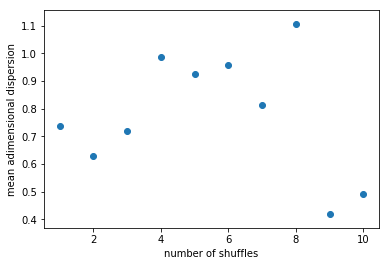

In [11]:
# demostració de que el shuffle és bo
N=10000
a=[0.0 for i in range(10)]
for n in range(1,11):
    desv=[0.0 for i in range(6)]
    for k in range(N):
        v=[i for i in range(6)]
        for j in range(n):
            rnd.shuffle(v)
        for j in range(6):
            desv[j]+=v[j]
    for i in range(6):
        desv[i]=np.abs((desv[i]/N-2.5)/np.sqrt(3.5/N))
    a[n-1]=sum(desv)/6
plt.scatter([i for i in range(1,11)],a)
plt.xlabel("number of shuffles")
plt.ylabel("mean adimensional dispersion")
plt.show()

In [13]:
# funcions amb aportacions desordenades
def prob1r(round_): # p(s(t))
    p=[0.0 for i in range(3)]
    for i in range(3):
        for n in range(6):
            for k in range(max(userround["round_id"])//10):
                if(oddity[k]==0):
                    OM=randomoptionmatrix(k)
                    if (OM[round_][n]==2*i):
                        p[i]+=1.0
        p[i]=p[i]/(6*odds)
    return p
print("prob 1 jugador i 1 ronda:",prob1r(5))
def prob1dtr(round_): # p(s(t+1),s(t))
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for n in range(6):
                for k in range(max(userround["round_id"])//10):
                    if(oddity[k]==0):
                        OM=randomoptionmatrix(k)
                        if (OM[round_][n]==2*i and OM[round_+1][n]==2*j):
                            p[i][j]+=1.0
            p[i][j]=p[i][j]/(6*odds)
    return p
print("prob 1 jugador i 2 rondes:",prob1dtr(5))
def probothersr(round_): # p(others s(t))
    p=[0.0 for i in range(3)]
    for i in range(3):
        for m in range(6):
            for k in range(max(userround["round_id"])//10):
                if(oddity[k]==0):
                    OM=randomoptionmatrix(k)
                    othersmean=0
                    for n in range(6):
                        if (n!=m):
                            othersmean+=OM[round_][n]
                    othersmean=2*round(othersmean/10)
                    if (othersmean==2*i):
                        p[i]+=1.0
        p[i]=p[i]/(6*odds)
    return p
print("prob 5 jugadors i 1 ronda:",probothersr(5))
def prob2r(round_): # p({s(t)})
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for l in range(3):
            for m in range(6):
                for k in range(max(userround["round_id"])//10):
                    if(oddity[k]==0):
                        OM=randomoptionmatrix(k)
                        othersmean=0
                        for n in range(6):
                            if (n!=m):
                                othersmean+=OM[round_][n]
                        othersmean=2*round(othersmean/10)
                        if (OM[round_][m]==2*i and othersmean==2*l):
                            p[i][l]+=1.0
            p[i][l]=p[i][l]/(6*odds)
    return p
print("prob 6 jugadors i 1 ronda:",prob2r(5))
def prob2dtr(round_): # p({s(t+1)},{s(t)})
    p=[[[0.0 for i in range(3)] for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for l in range(3):
                for m in range(6):
                    for k in range(max(userround["round_id"])//10):
                        if(oddity[k]==0):
                            OM=randomoptionmatrix(k)
                            othersmean=0
                            for n in range(6):
                                if (n!=m):
                                    othersmean+=OM[round_][n]
                            othersmean=2*round(othersmean/10)
                            if (OM[round_][m]==2*i and OM[round_+1][m]==2*j and othersmean==2*l):
                                p[i][j][l]+=1.0
                p[i][j][l]=p[i][j][l]/(6*odds)
    return p
print("prob 6 jugadors i 2 rondes:",prob2dtr(5))
def transferentropyr(round_,realizations): # definida en bits
    h=0.0
    for n in range(realizations):
        p1=prob1r(round_)
        p1dt=prob1dtr(round_)
        p2=prob2r(round_)
        p2dt=prob2dtr(round_)
        for i in range(3):
            for j in range(3):
                if (p1dt[i][j]!=0.0 and p1[i]!=0.0):
                    h+=-p1dt[i][j]*log2(p1dt[i][j]/p1[i])
                for l in range(3):
                    if (p2dt[i][j][l]!=0.0 and p2[i][l]!=0.0):
                        h+=p2dt[i][j][l]*log2(p2dt[i][j][l]/p2[i][l])
    h=h/realizations
    return h
def mutualinfor(round_,realizations):
    I=0.0
    for r in range(realizations):
        p1=[0.0 for i in range(3)]
        p2=[0.0 for i in range(3)]
        p12=[[0.0 for i in range(3)] for i in range(3)]
        for k in range(max(userround["round_id"])//10):<
            OM=randomoptionmatrix(k)
            if(any(1 in array for array in OM)==False and any(3 in array for array in OM)==False):
                for i in range(3):
                    for m in range(6):
                        if (OM[round_][m]==2*i):
                            p1[i]+=1.0
                        othersmean=0
                        for n in range(6):
                            if (n!=m):
                                othersmean+=OM[round_][n]
                        othersmean=2*round(othersmean/10)
                        if (othersmean==2*i):
                            p2[i]+=1.0
                        for j in range(3):
                            if (OM[round_][m]==2*i and othersmean==2*j):
                                p12[i][j]+=1.0
        for i in range(3):
            p1[i]=p1[i]/(6*odds)
            p2[i]=p2[i]/(6*odds)
            for j in range(3):
                p12[i][j]=p12[i][j]/(6*odds)
        for i in range(3):
            for j in range(3):
                if (p12[i][j]!=0.0):
                    I+=p12[i][j]*log2(p12[i][j]/(p1[i]*p2[j]))
    I=I/realizations
    return I

prob 1 jugador i 1 ronda: [0.21014492753623187, 0.42028985507246375, 0.38405797101449274]
prob 1 jugador i 2 rondes: [[0.050724637681159424, 0.12318840579710146, 0.07971014492753623], [0.14492753623188406, 0.21014492753623187, 0.10144927536231885], [0.07971014492753623, 0.2246376811594203, 0.11594202898550725]]
prob 5 jugadors i 1 ronda: [0.014492753623188406, 0.8405797101449275, 0.10869565217391304]
prob 6 jugadors i 1 ronda: [[0.0, 0.2391304347826087, 0.014492753623188406], [0.0, 0.35507246376811596, 0.08695652173913043], [0.014492753623188406, 0.2971014492753623, 0.021739130434782608]]
prob 6 jugadors i 2 rondes: [[[0.0, 0.036231884057971016, 0.007246376811594203], [0.0, 0.06521739130434782, 0.007246376811594203], [0.0, 0.050724637681159424, 0.007246376811594203]], [[0.0, 0.08695652173913043, 0.028985507246376812], [0.0, 0.15942028985507245, 0.050724637681159424], [0.0, 0.07246376811594203, 0.007246376811594203]], [[0.0, 0.08695652173913043, 0.0], [0.0, 0.1956521739130435, 0.0217391

[0.05070529451580503, 0.022659373144213013, 0.06014008407389906, 0.062157440669042746, 0.05688980075659439, 0.06576287865508501, 0.037443100943546, 0.08396503531062738, 0.14508990628648052] [0.07327676993788279, 0.1362487671902051, 0.08096549089084108, 0.03285544541020378, 0.08725521816013848, 0.09695719196813245, 0.04159207493658796, 0.12402910523691515, 0.20640142231131536]


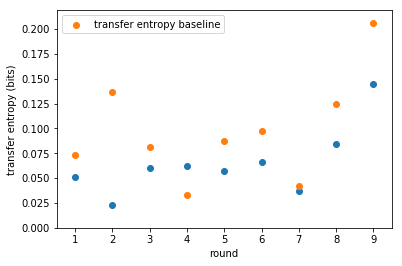

In [14]:
T=[0.0 for k in range(9)]
Tr=[0.0 for k in range(9)]
for k in range(9):
    T[k]=transferentropy(k)
    Tr[k]=transferentropyr(k,7)
print(T,Tr)
plt.scatter(list(range(1,10)),T)
plt.scatter(list(range(1,10)),Tr,label="transfer entropy baseline")
plt.xlabel("round")
plt.ylabel("transfer entropy (bits)")
plt.legend(loc="upper left")
plt.ylim(0.0)
plt.show()

[0.055388145597895275, 0.003952615609523313, 0.0206629286954327, 0.07341974664531245, 0.002530194389475004, 0.01773122703807245, 0.04386045338266618, 0.07893428067291168, 0.1223434163921027, 0.07092155917127937]
[0.055388145597895275, 0.003952615609523313, 0.0206629286954327, 0.07341974664531245, 0.002530194389475004, 0.01773122703807245, 0.04386045338266618, 0.07893428067291168, 0.1223434163921027, 0.07092155917127937]


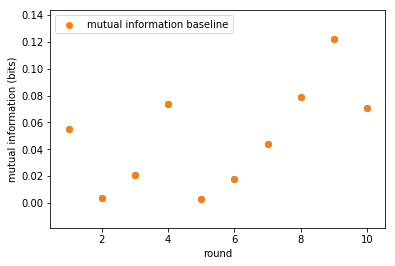

In [15]:
I=[0.0 for k in range(10)]
Ir=[0.0 for k in range(10)]
for k in range(10):
    I[k]=mutualinfo(k)
    Ir[k]=mutualinfor(k,1)
print(I)
print(Ir)
plt.scatter(list(range(1,11)),I)
plt.scatter(list(range(1,11)),Ir,label="mutual information baseline")
plt.xlabel("round")
plt.ylabel("mutual information (bits)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# El problema amb la MI i la seva baseline és que, encara que es barregin les contribucions, si la barreja és entre els jugadors
# de cada joc per separat, com que se suma sobre tots els jugadors, el càlcul acaba sent el mateix.
# Segurament cal barrejar entre tots els jugadors de tots els  jocs, separant per rondes.

In [27]:
# MI amb contribucions generades aleatòriament
def mutualinfor2(round_,realizations):
    I=0.0
    OM=[0 for r in range(6)]
    for r in range(realizations):
        p1=[0.0 for i in range(3)]
        p2=[0.0 for i in range(3)]
        p12=[[0.0 for i in range(3)] for i in range(3)]
        for k in range(24):
            for r in range(6):
                    OM[r]=rnd.randint(0,3)
            for i in range(3):
                for m in range(6):
                    if (OM[m]==i):
                        p1[i]+=1.0
                    othersmean=0
                    for n in range(6):
                        if (n!=m):
                            othersmean+=OM[n]
                    othersmean=round(othersmean/5)
                    if (othersmean==i):
                        p2[i]+=1.0
                    for j in range(3):
                        if (OM[m]==i and othersmean==j):
                            p12[i][j]+=1.0
        for i in range(3):
            p1[i]=p1[i]/(6*24)
            p2[i]=p2[i]/(6*24)
            for j in range(3):
                p12[i][j]=p12[i][j]/(6*24)
        for i in range(3):
            for j in range(3):
                if (p12[i][j]!=0.0):
                    I+=p12[i][j]*log2(p12[i][j]/(p1[i]*p2[j]))
    I=I/realizations
    return I

[0.06934426243455544, 0.04613817775855697, 0.0345905378476701, 0.023118874521808344, 0.03954445488565986, 0.0098599976991816, 0.06207438844310365, 0.05550124144765335, 0.016551005117828758, 0.010169054813600491]


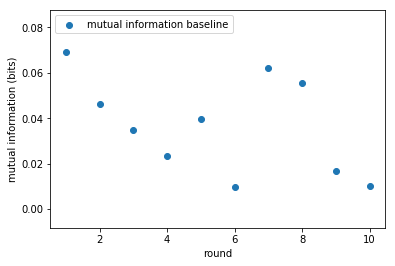

In [31]:
Ir2=[0.0 for k in range(10)]
for k in range(10):
    Ir2[k]=mutualinfor2(k,1)
print(Ir2)
plt.scatter(list(range(1,11)),Ir2,label="mutual information baseline")
plt.xlabel("round")
plt.ylabel("mutual information (bits)")
plt.legend(loc="upper left")
plt.show()